# Linear Regression

## 本筆記用來學習線性迴歸，包含：Ordinary Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression.

* 機器學習(Machine Learning)比較注重模型的預測能力: 在做機器學習的時候，我們比較注重於調參&嘗試各種複雜的模型(複雜的模型預測能力好，可是較不易解釋模型為何是建成那個樣)。
* 統計學習(Statistical Learning)則較注重於模型是否有足夠的解釋能力: 做統計學習時，我們比較偏向去做各種檢定，以確認模型是否有好的解釋能力(模型預測能力就不一定是優先考量了)。
* 我們這裡談的是如何以機器學習的方式做迴歸。若你想用統計學習的方式來做，請使用```statsmodels```套件: https://www.statsmodels.org/stable/index.html

---

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reference:
* https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch10/ch10.ipynb

# 載入房價資料，並略做EDA (Exploratory Data Analysis)

房價資料來源： https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

現在，我們來將資料載入成Pandas DataFrame:

In [68]:
# 載入數據至Pandas資料表

data_url = "https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch10/housing.data.txt"
df = pd.read_csv(data_url,delim_whitespace=True,header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head(5) # 看資料表前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


畫出各欄位之間的correlation:

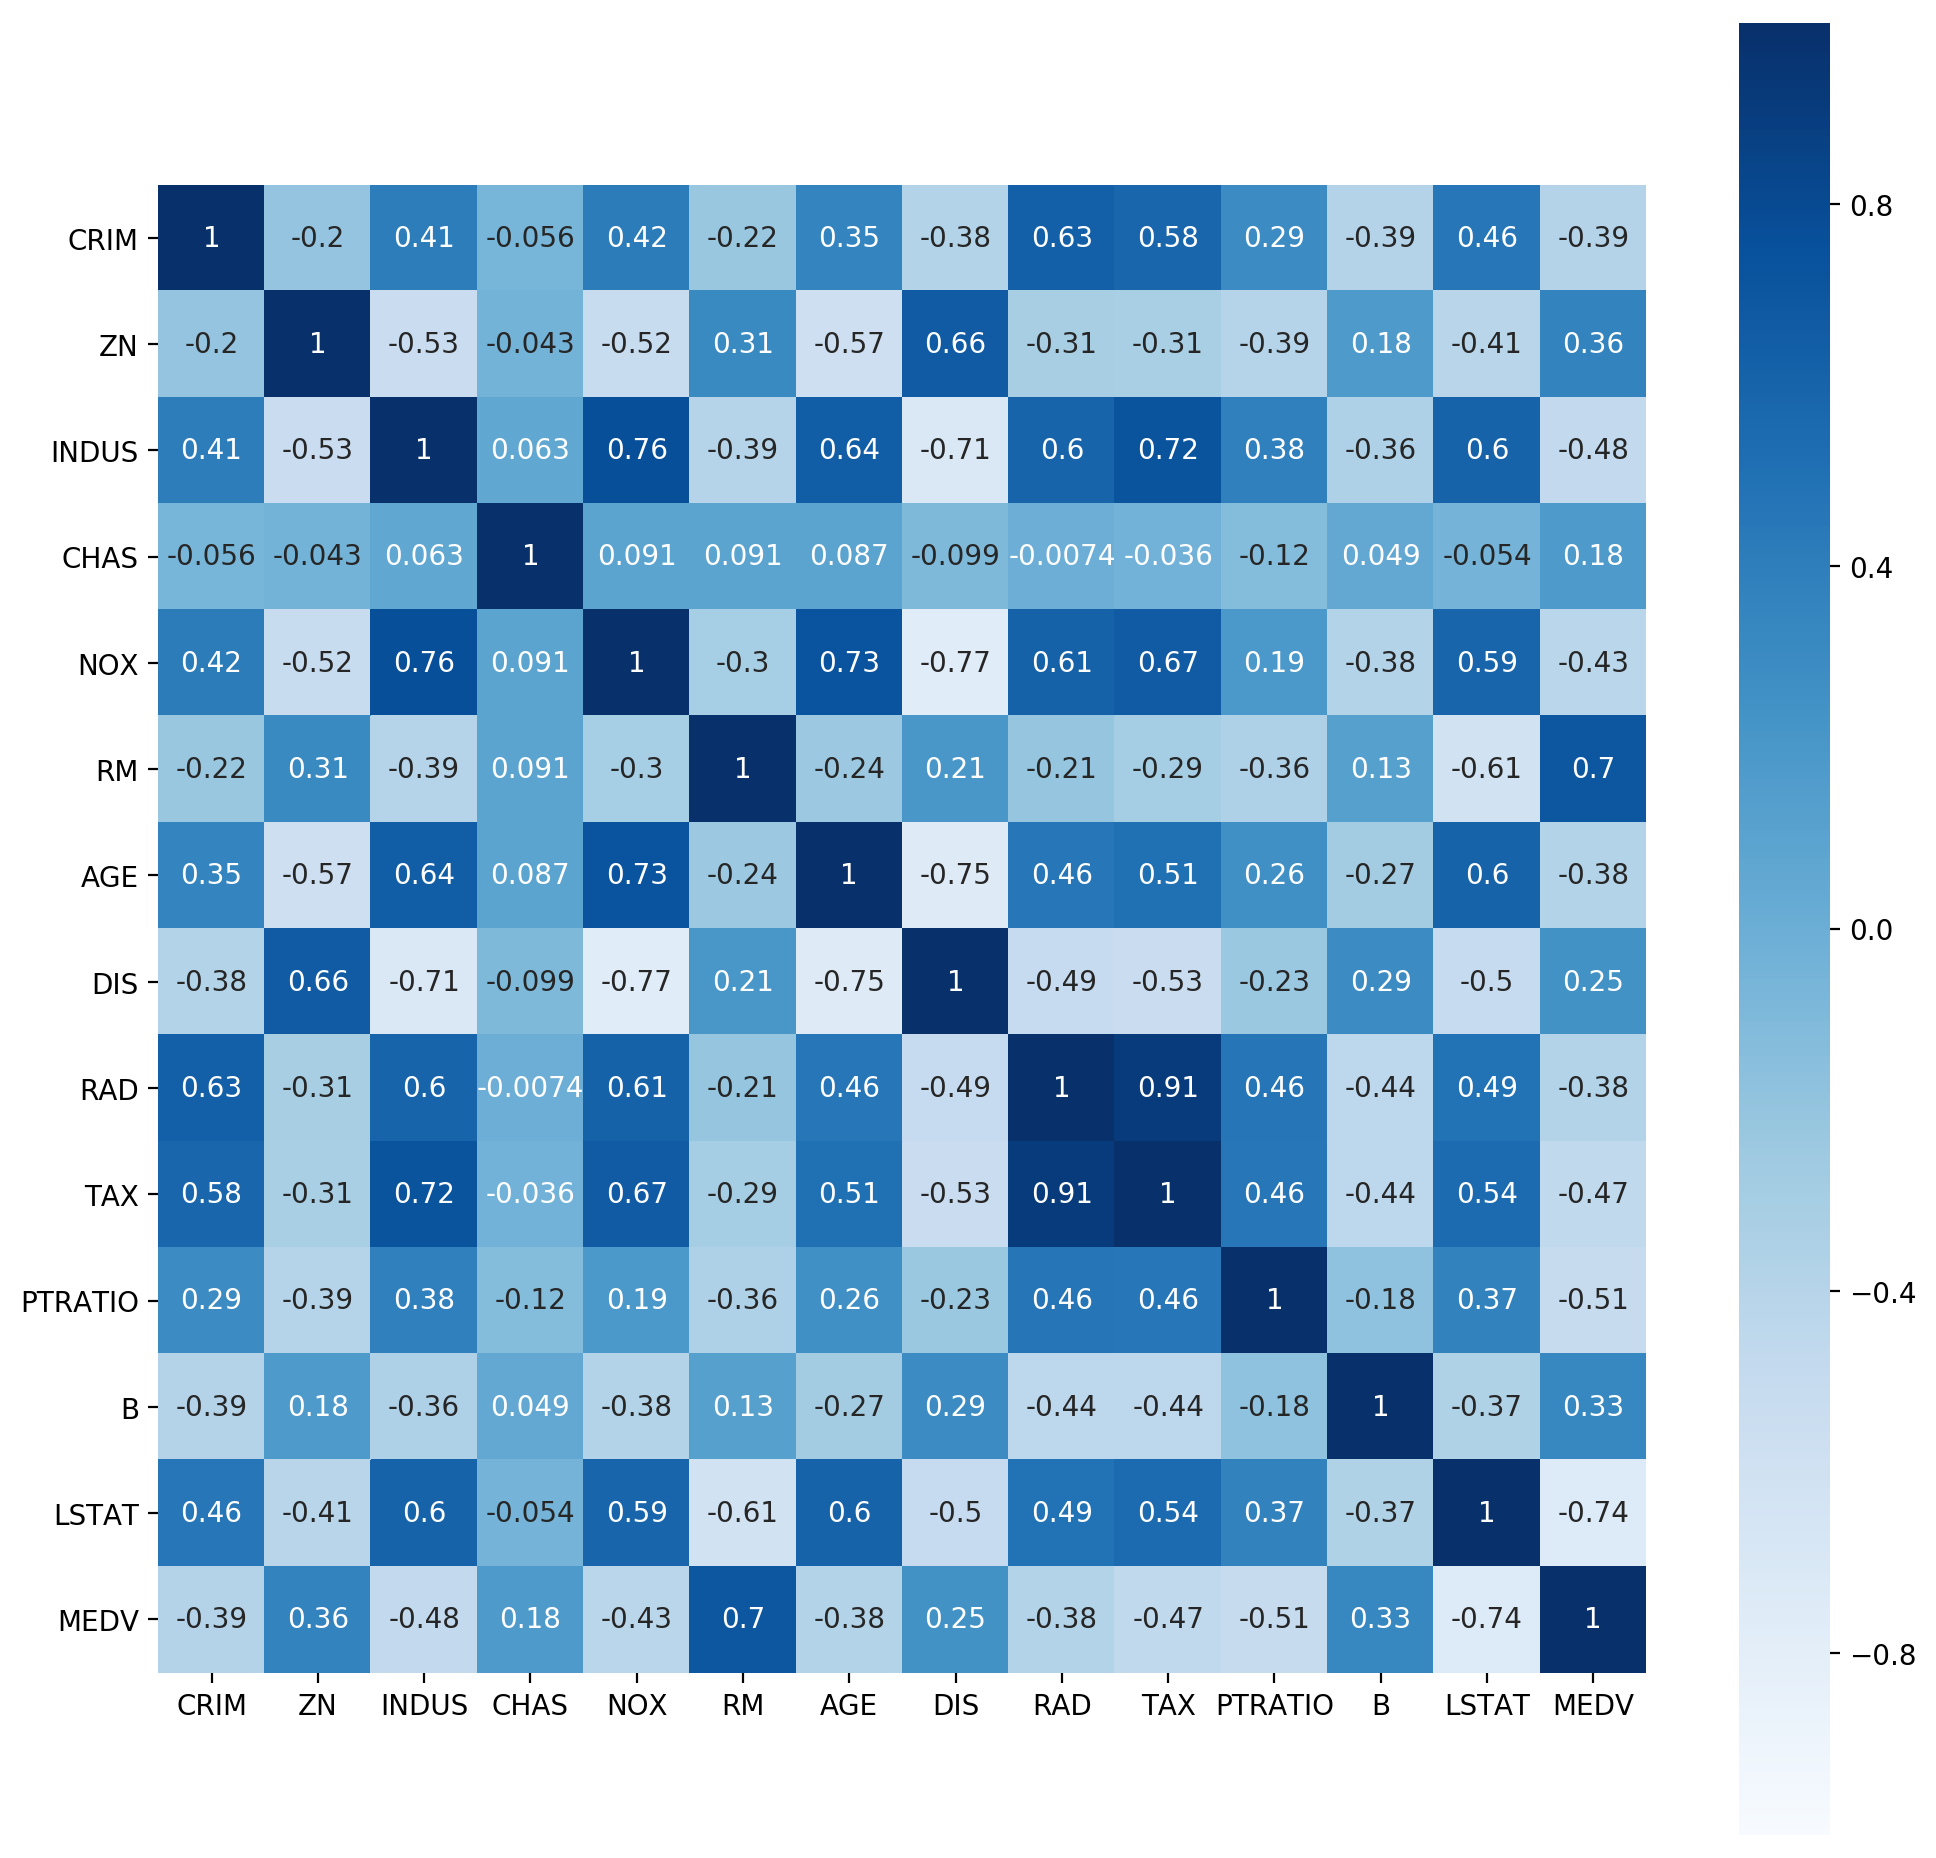

In [69]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( df.corr(),cmap="Blues", #df.corr()看不同欄位之間的相關係數
             vmin=-1,
             vmax=1,
             square=True,
             annot=True)
plt.show()

<Figure size 4000x2400 with 0 Axes>

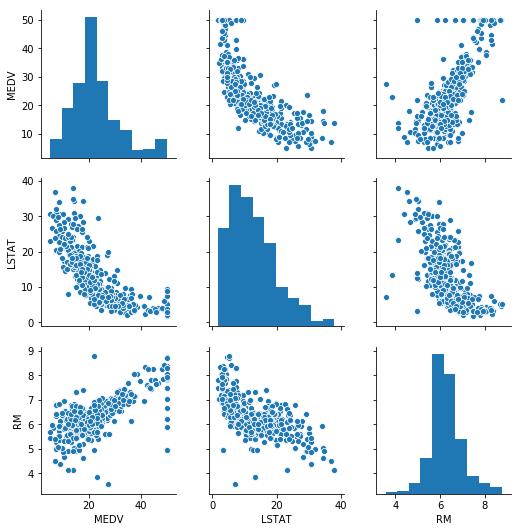

In [70]:
plt.figure(figsize=(20,12),dpi=200)

sns.pairplot(data=df,vars=["MEDV","LSTAT","RM"]) #sns.pairplo探討倆倆關系
plt.show()

# 資料切成訓練和測試兩份，並且做標準化

In [71]:
from sklearn.model_selection import train_test_split #把資料分訓練測試

x = df.iloc[:, :-1].values
y = df['MEDV'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3) #設定訓練測試比例

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [74]:
a=np.random.normal(0,1,(100000, ))
a

array([ 1.9392336 , -1.46663369,  1.22197046, ..., -0.73206109,
       -0.76092178,  0.51429822])

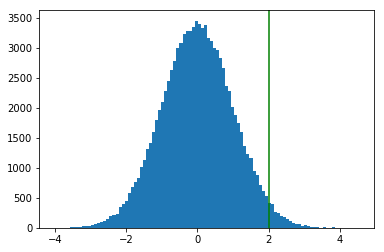

In [75]:
_ = plt.hist(a, bins=100)

plt.axvline(2, color="g")

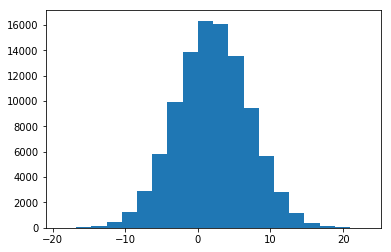

In [76]:
import numpy as np
import matplotlib.pyplot as plt
mean = 2
std = 5 
num_samples = 100000
data = np.random.normal(mean, std,(num_samples, ))
_ = plt.hist(data, bins=20)

# 線性迴歸

## 1. 普通線性迴歸

首先，試試LSTAT，看其是否能用來解釋y(和y有多少程度存在線性關係)。

In [77]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [78]:
regressor = LinearRegression()
model = regressor.fit(train_x[:,[-1,]],train_y)

In [79]:
print(model.coef_)
print(model.intercept_)

[-6.80661896]
22.640677966101695


### 以$R^2$評估迴歸結果:

In [80]:
from sklearn.metrics import r2_score

In [81]:
pred_y = model.predict(test_x[:,[-1,]])
r2_score(test_y,pred_y)

0.5227677597532355

$R^2$一般來說介於0和1之間。

$R^2$可解釋為: y有$R^2\times 100\%$的程度，是可以用x來解釋的。

該資料欄位及其意義如下:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s

In [82]:
# 練習: 一般來說，離群值會讓模型學得比較不好。試著去掉離群值，然後再訓練一次模型，看$R^2$有沒有變好。
#
#
#


In [27]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [89]:
[*zip(*[range(len(feature_name))], feature_name)]

[(0, 'CRIM'),
 (1, 'ZN'),
 (2, 'INDUS'),
 (3, 'CHAS'),
 (4, 'NOX'),
 (5, 'RM'),
 (6, 'AGE'),
 (7, 'DIS'),
 (8, 'RAD'),
 (9, 'TAX'),
 (10, 'PTRATIO'),
 (11, 'B'),
 (12, 'LSTAT'),
 (13, 'MEDV')]

In [95]:
# 練習：選所有feature來做迴歸，並計算出R^2
#
# regressor = LinearRegression()
# model = regressor.fit(...)

feature_name = df.columns[:]
for i,j in enumerate(feature_name):
    X = df.
    y = df.[j]
    from sklearn import linear_model; from sklearn.linear_model import LinearRegression; from sklearn.metrics import mean_squared_error; from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg_all = linear_model.LinearRegression(n_jobs=-1) # n_jobs: CPU used.
    reg_all.fit(X_train, y_train)
    y_pred = reg_all.predict(X_test)
    print("PTRATIO R^2: {}".format(reg_all.score(X_test, y_test))) #
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("PTRATIO Root Mean Squared Error: {}".format(rmse))

ValueError: Found array with 0 feature(s) (shape=(354, 0)) while a minimum of 1 is required.

In [ ]:
# 練習：選所有feature(除去可能有共線性的feature)來做迴歸，並計算出R^2
#
# regressor = LinearRegression()
# model = regressor.fit(...)

In [ ]:
# 練習：選RM來做迴歸，並計算出R^2
#
# regressor = LinearRegression()
# model = regressor.fit(...)

In [ ]:
# 練習：選B來做迴歸，並計算出R^2
#
# regressor = LinearRegression()
# model = regressor.fit(...)

## 2. 多項式迴歸

$y \sim \alpha~x_{LSTAT} + \beta~x_{LSTAT}^2+\gamma$

In [ ]:
train_lstat_and_square = np.hstack([train_x[:,[-1,]],train_x[:,[-1,]]**2])
test_lstat_and_square = np.hstack([test_x[:,[-1,]],test_x[:,[-1,]]**2])

In [ ]:
regressor = LinearRegression()
model = regressor.fit(train_lstat_and_square,train_y)

In [ ]:
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

In [ ]:
plt.scatter(test_x[:,-1],test_y,label="test_y")
plt.scatter(test_x[:,-1],pred_y,label="pred_y")
plt.legend()

plt.xlabel("$x_{LSTAT}$")
plt.ylabel("$y$")
plt.show()

In [ ]:
tmp = pd.DataFrame(np.vstack([train_x[:,-1]**1,train_x[:,-1]**2]).T)

In [ ]:
tmp.corr()

## 3. Lasso Regression

先來做很多項的多項式回歸:

In [ ]:
train_lstat_and_square = np.hstack([train_x[:,[-1,]]**j for j in range(1,10)]   # 共九項
                                  )
test_lstat_and_square = np.hstack([test_x[:,[-1,]]**j for j in range(1,10)]
                                  )

In [ ]:
regresser = LinearRegression()
model = regressor.fit(train_lstat_and_square,train_y)

In [ ]:
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

看weights和biases:

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
regressor = Lasso(max_iter=100000)
regressor

In [ ]:
model = regressor.fit(train_lstat_and_square,train_y)
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

看weights和biases:

In [ ]:
[*regressor.coef_]

In [ ]:
model.intercept_

## 4. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# 練習：Ridge Regression
# ...
# ...

## 5. Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# 練習: 查一下scikit-learn API: http://scikit-learn.org/stable/index.html,
#      告訴我什麼是Elastic Net？

In [ ]:
# 練習: Elastic Net Regression
# ...
# ...